# The added value of modelling premise plumbing systems

## What is a premise plumbing system?

Premise plumbing systems is a reference to the “last mile” of water delivery and is an integral part of buildings (residential or commercial). This system comprises of pipes, fixtures, fittings, and other appurtenances used for indoor water supply, heating, and sanitation. This plumbing system is connected to the outdoor drinking water distribution network via a service line. Typically, the owner of the premise is also responsible for the plumbing system within. 

## The challenges in understanding premise plumbing systems

The plumbing system offers challenges in various ways:
- There is a diversity in households and thus, also, diversity in the composition of plumbing systems (driven by choices during construction and historical choices of premise owners).
- There is seldom availability of documentation for existing plumbing systems. Unlike the distribution network with a centralized owner (drinking water utility), the plumbing system is the domain of individual property owners. 
- Plumbing systems are hidden behind walls which makes it difficult to extract useful information. For example, which materials are present in the system.
- The flow within a plumbing system is intimately linked to the water demand at the premise level. Water consumption is stochastic in nature (water demand is not predictable at every instant, but its statistics can be estimated). This means that water usage/flow is intermittent with multiple periods of standstill.

## The role of modelling in understanding premise plumbing systems better

The ultimate goal of a water distribution system is to ensure that potable and safe drinking water is delivered without any additional risks to consumer health. The quality of drinking water at the tap is decide by the complex interplay between the characteristics of the plumbing and the flow in the system determined by water consumption. The deterioration of water quality can occur either in a microbiological or chemical sense. 

Doing tests in real households is challenging because of the various unknowns surrounding the plumbing system. A proxy for real plumbing systems are testbeds or experimental facilities at the laboratory scale. A few such testbeds to study phenomena in plumbing systems under controlled conditions already exist. Examples include the Home Plumbing Simulator in the USA and the HomeWaterLab in the Netherlands. 

Another avenue for researching phenomena in premise plumbing systems is through modelling. A __[recent book](https://doi.org/10.1061/9780784485101)__ summarizes modelling efforts and applications. Modelling offers a bottom-up approach to studying the phenomena taking place in premise plumbing. This is facilitated through the underlying equations that drive the model mechanics. A shortcoming of modelling, however, is that not all phenomena in real systems can be included with the equations, i.e. the modelling will be restricted by the choice of assumptions and simplifications.

# **LEadGO** - Mechanistic model for dissolution and propagation of substances through a premise plumbing system
A mechanistic model has been developed to study the dissolution and propagation of substances through a premise plumbing systems. The backbones of this model are EPANET/WNTR and (py)SIMDEUM. 
- __[EPANET](https://www.epa.gov/water-research/epanet)__ is a modelling software that is capable of simulating the hydraulic and water quality behavior in pressurized pipe networks. Examples of hydraulic parameters include flow rate and pressures. Examples of water quality parameters include the age of water or the concentration of a chemical. EPANET is a freely available software with a graphical user interface. __[WNTR](https://usepa.github.io/WNTR/)__ is a freely available python package that also possesses the major functionalities and capabilities of EPANET. Note that EPANET files can also be accessed with text editors such as __[Notepad++](https://notepad-plus-plus.org/)__.
- In a plumbing system, the hydraulics are determined by the demand induced by the residents/users/apparatus at the premise level. Water demand is stochastic in nature and its statistics can be captured. The program __[SIMDEUM](https://www.kwrwater.nl/en/tools-producten/simdeum/)__ uses these statistics to create water demand patterns. SIMDEUM is a Matlab program and recently, a python version of SIMDEUM has been introduced – __[pySIMDEUM](https://github.com/kwr-water/pysimdeum)__.

The following ingredients are needed to set up the model (as illustrated in the figure below):
- Premise plumbing system geometry: The plumbing system is a physical system and can be defined by means of it dimensions (lengths and diameters of pipes). The plumbing system is branched and the branch ends at a consumption point (a point where water is consumed or used). The layout of the geometry is determined by the relative placement of the demand points and the pipe characteristics. The geometry is made on EPANET.  
- Water demand: The flow in the plumbing system is driven by the demand generated at the consumption points, which in turn is driven by aspects such as the number of end users and their attitude towards water usage (for example, conscious about water saving). The demand patterns (water demand as function of time) are generated for each consumption point. The demands are generated using SIMDEUM.
- Substance dissolution: Substance releasing locations need to be assigned to certain pipes. Substance dissolution in water can be characterized by two parameters – an equilibrium concentration and a dissolution timescale. The equilibrium concentration is the maximum concentration of the substance that can dissolve in the water whereas the dissolution timescale represents how quickly the equilibrium concentration can be achieved. These values can be added to EPANET.

<div>
<img src="Figures/Framework.jpg" width="1000"/>
</div>

<div class="alert alert-block alert-success">
<b>LEadGO - What's in a a name?: </b> We refer to the abovementioned mechanistic model as LEadGO. Even though the model is applicable for several substances, it was originally developed and used for lead in drinking water. This modelling framework uses building blocks to arrive at the end result, similar to LEGO. In this model lead "goes" from the walls (leaching) and "goes" towards the demand points (propagation). Eventually, the outputs of this model can be used to determine where lead "goes" within the human body. Moreover, the model can be extended to test sampling protocols to detect and localize lead-releasing components, as we eventually want them to "go" away.
</div>

# Prerequisites for application of the program
The program is available in the form of a Jupyter notebook with an underlying Python script and relies on several dependencies:
- The user is familiar with python. The script is neither accompanied with a user interface nor is it entirely plug-and-play. Installing packages, varying inputs or plotting results will require familiarity with the python environment. 
- The user has a basic understanding of an EPANET model – for example, the terminology of the basic elements. The EPANET simulations are performed on python using WNTR – an EPANET compatible Python package.
- The program currently only simulates the mechanics of substance dissolution/propagation. It means that the generation of input files (geometry of plumbing system and integration of water demand patterns) is a pre-processing step to be taken by the user. Stochastic water demand patterns can then be attached to the consumption points of the plumbing geometry using functions on (py)SIMDEUM.  
- The substance dissolution characteristics are to be defined by the user. These values can be determined by values available in scientific literature or by performing experiments with actual pieces of the substance.    

<div class="alert alert-block alert-info">
<b>Tip:</b> The current program is a first attempt at introducing the mechanistic model to a broader userbase and is thus rather limited in its functionality and user-friendliness. In the following iterations, supported by feedback from users, efforts can be made to make the script more useful and user-friendly. 
</div>

The cell `Appendix: LEadGO workflow - getting started` provides information that can help one gte started. To see what a certain function does or to see a description of its inputs and outputs, please run the command `help(function_name)` where function_name is the name of the function. 

# Importing necessary libraries

The next cell imports libraries and functions needed to run the program. 

In [3]:
from ImportFunctions import *

# Running the script

The function `run_model` is the core function to run the model once complete input files (input files with geometry and water demand patterns) are ready. This function runs the model with the trifecta of geometry, water demand, and substance dissolution. This function uses the inputs to calculate substance concentrations at the consumption points. Only the final iteration of the pattern duration is considered. Two files are saved. One wherein the water demand and substance concentrations at all consumption points are stored (“###.npz”). Another wherein all the input parameters are saved for reference (“###Settings.pkl”).

<div class="alert alert-block alert-info">
<b>Level 1:</b> This is the first level of running the program. This function is sufficient for situations where complete input files available (the geometry of the premise plumbing as well as the water demand patterns). The cell below is a minimal working example based on sample input files.
</div>

The following inputs necessary to successfully run the program: 
- **files**: This variable has multiple fields that are related to the files to be analyzed.
    - Input Directory: This refers to the directory where all the EPANET input files are present. (EPANET input file = geometry + water demand patterns designated to consumption points). The format is “Directory\\Subdirectory\\Subsubdirectory\\”. 
    - Input Prefix: This refers to the prefix of the input file names. The recommended naming of the input files is “ABCxx.inp”. “ABC” can be a name of the users choice, for example “Apartment” or “PlumbingInput”. This prefix is followed by “xx” which refers to a two digit number. In case the user chooses to make 25 input files (each input file has same plumbing geometry but variation in water demand patterns), “xx” runs from “01” to “25”.
    - Output Directory: This refers to the directory where all the output files will be saved. The format is “Directory\\Subdirectory\\Subsubdirectory\\”.
    - Output Prefix: This refers to the prefix of the output file names. The format is “Directory\\Subdirectory\\Subsubdirectory\\XYZ”. Two files will be saved with names “XYZ.npz” and “XYZSettings.pkl”.
    - Number of files: This defines the number of input files that will simulated and is related to the suffix for the input files.  
- **consumption_properties**: This variable has multiple fields that are related to the generated consumption patterns.
    - Consumption Points: This is the list of all nodes (or junctions) that where water is demanded. An EPANET input file has multiple nodes – nodes that are a demand point and nodes that are simply present to connect pipes. Open the EPANET input file and view the list of junctions. Junction names attributed to the demand points are added to this variable with the function `extract_demand_nodes`.
    - Pattern Duration [s]: This is the total duration for which water demand patterns have been created. This is a value to be expressed in seconds. 
    - Pattern Timestep [s]: This refers to the granularity of the water demand patterns, i.e. what is the resolution at which water demand can change. This is a value to be expressed in seconds.
    - Pattern Values [-]: This refers to the number of unique values of the pattern and is (Pattern Duration) ÷ (Pattern Timestep). 
- **time_properties**: This variable has multiple fields that are related to the desired timesteps for the simulations. 
    - Hydraulic Timestep [s]: This timestep determines how often a hydraulic simulation is performed. Ideally, this should be equal to the timestep used for generating water demand patterns. Hydraulic simulations at a certain timestep are not dependent on the previous timestep. Therefore, the choice here will not affect hydraulic parameters (flow and pressure) but can affect water quality parameters (substance concentration). If this value is greater than either the pattern or report timestep, the hydraulic timestep will be automatically reduced.
    - Quality Timestep [s]: This timestep determines the fineness with which water quality simulations are performed. In contrast to hydraulic simulations, water quality simulations at a certain timestep are dependent on the outcomes of the previous step. It is recommended to keep this value lower than the hydraulic timestep (at least with a factor ten). Timesteps have integer values and the lowest possible value is unity. 
    - Duration [s]: This refers to the total duration of the simulations. It is recommended to choose a value twice the total duration for which water demand patterns are generated. 
    - Report Timestep [s]: This refers to how often the calculated values are logged.  
    - Pattern Timestep [s]: This refers to the granularity of the water demand patterns, i.e. what is the resolution at which water demand can change.
- **quality_properties**: This variable has multiple fields regarding the parameters surrounding water quality simulations.
    - Parameter: Determines the kind of water quality analysis that is to be performed. The default value for the current script is ‘CHEMICAL’ to simulate substance dissolution and propagation.
    - Units: Determines the units for which the chemical concentrations are computed. Acceptable values are ‘mg/L’ and ‘ug/L’.
    - Tolerance: Determines the accuracy with which the water quality simulations are performed. If two water parcels have a chemical concentration lower than this value, they are then considered to be equal. The default value is 0.01 (with corresponding units). Lowering this value will lead to increased computational time.
    - Diffusivity: This is the molecular diffusivity of the chemical relative to that of chlorine in water. It is used only when mass transfer limitations are considered in pipe wall reactions.
- **leaching_properties**: This variable has fields that determines the nature and locations of substance dissolution into water.
    - Equilibrium Concentration: This is the equilibrium concentration of the substance in drinking water. The units are equal to the choice in quality_properties.
    - Rate [µg/(m2·s)]: This is the rate at which the substance leaches into the drinking water.
    - Locations: This is an array of all pipes (or links) where the substance can leach into water.
- **factor**: This is a numerical value with which the time and demand properties of simulations are altered. All water demands are reduced by the factor while all timesteps are increased with the same factor. This is necessary to combat the high displacement of water in short pipes (caused by high velocities) which can lead to inaccuracies in water quality computations. Therefore, the timestep for water quality calculations is not adjusted to allow for a greater separation between hydraulic and water quality timescales. The higher the factor, the longer the computational times. Details regarding this are explained in __[this paper](https://doi.org/10.4995/WDSA-CCWI2022.2022.14741)__. 

<div class="alert alert-block alert-info">
<b>Tip:</b> The progress of the function in terms of performing the simulations is visible in the terminal below the cell. The simulations can last from anywhere between minutes to hours depending on the selection of the input parameters. 
</div>



In [4]:
files = {'Input Directory':'Examples\\Input\\',
         'Input Prefix':'Example',
         'Output Directory':'Examples\\Output\\',
         'Output Prefix':'Output',
         'Number of files': 20}
consumption_properties = {'Pattern Duration':86400*7,
                         'Pattern Timestep':10,
                         'Pattern Values': 86400*7/10}
time_properties = {'Hydraulic Timestep':10, 
                  'Quality Timestep':1, 
                  'Duration':86400*14, 
                  'Report Timestep':10, 
                  'Pattern Timestep': 10}
quality_properties = {'Parameter':'CHEMICAL',
                     'Units':'mg/L',
                     'Tolerance':0.01,
                     'Diffusivity':1}
leaching_properties = {'Equilibrium Concentration':110./1000.,
                      'Rate':0.115,
                      'Locations':['25']}

factor = 1
sample_pattern= []
mask_pattern = []
sample_moments = None

In [5]:
run_model(files,
         consumption_properties,
         time_properties,quality_properties,
         leaching_properties,factor)

os.remove('temp.bin')
os.remove('temp.inp')
os.remove('temp.rpt')

Processing file 1/20
Processing file 2/20
Processing file 3/20
Processing file 4/20
Processing file 5/20
Processing file 6/20
Processing file 7/20
Processing file 8/20
Processing file 9/20
Processing file 10/20
Processing file 11/20
Processing file 12/20
Processing file 13/20
Processing file 14/20
Processing file 15/20
Processing file 16/20
Processing file 17/20
Processing file 18/20
Processing file 19/20
Processing file 20/20
Time elapsed: 220 seconds


# Function to populate an input file with water demand patterns from another input file 

<div class="alert alert-block alert-info">
<b>Level 2:</b> A situation could arise where an input file is created with a different premise plumbing system. However, there is a desire to reuse existing water demand patterns (for example, to purely understand the influence of geometry variation on substance concentrations at consumption points). In such a case, it is also possible to simply copy demand patterns from an existing file. 
</div>

The two functions below assist this specific scenario:
- copy_demand_from_existing_geometry: This function extracts water demand patterns from a certain set of input files and copies it to another set of files. There is also an option to select 
- run_model: This function runs the model with the trifecta of geometry, water demand, and substance leaching. This function uses the inputs to calculate substance concentrations at the consumption points. Only the final iteration of the pattern duration is considered. Two files are saved. One wherein the water demand and substance concentrations at all consumption points are stored (“###.npz”). Another wherein all the input parameters are saved for reference (“###Settings.pkl”).

The function `minimal_working_example_copy_demand_from_existing_geometry` gives an example of how demand patterns can be copied from one series of files to another. The demand patterns are copied from files in "Examples/CopyExample/Input" (old geometry with old water demand patterns) to the files in "Examples/CopyExample/OutputRaw" (new geometry with no water demand patterns) and saved in "Examples/CopyExample/Output" (new geometry with old water demand patterns). As a result, the size of the files in "Examples/CopyExample/Output" changes from 13 KB to 7000 KB. 

In [ ]:
minimal_working_example_copy_demand_from_existing_geometry()

# Loading the simulation results

Once the simulations have been completed, the results are saved at the desired location. In order to proceed with processing the results further, the data needs to be loaded back in. This functionality has been kept separate in order to facilitate loading and post-processing previously run simulations without having to rerun them again.

This can be performed with the function `load_output` which reads in the results (water demand and substance concentrations) as well as the setting with which the simulations were performed. 

In [7]:
demand, water_quality, run_settings = load_output(files['Output Directory']+files['Output Prefix'])

# Exporting data in other formats

The script thus far has run the simulations and exported data into formats such as `.npz` and `.pkl`. These formats allow for a compact and quick storage of the results. It is, however, not unfathomable that there is a desire to save data in formats that is readily transferable. To facilitate that two functions are available.

- npz_to_xlsx: This function converts the NPZ files to XLSX files. This means that the entire time series of the simulations are saved in Excel format. This conversion takes longer and is also the reason it has not been included as a default. The data is saved in sheets with names 'DemXX' or 'QualXX' where XX refers to the number of the input file. 
- pkl_to_csv: This function rewrites the setting with which the simulations were performed into CSV format.

In [ ]:
npz_to_xlsx("Examples\\Output\\Output") 

In [ ]:
pkl_to_csv("Examples\\Output\\Output")

# Computing average concentrations at the consumption points

Once the output has been read, the data can be processed in multiple fashions. One such action is to compute the statistics of substance concentrations at the different consumption points. This can be achieved with the function `compute_tap_outputs` which computes the total masses of substance and water across all consumption points. This can help compute the average substance concentration for the duration belonging to each individual input file.

In [10]:
tap_outputs = compute_tap_outputs(demand,water_quality,
                              run_settings['TimeProperties']['Pattern Timestep'])
for tap in range(len(run_settings['ConsumptionProperties']['ConsumptionPoints'])):
    print('Average substance concentration at ' + run_settings['ConsumptionProperties']['ConsumptionPoints'][tap] + ' is ' + str(np.round(np.sum(tap_outputs['TotalSubstance'],axis=1)[tap]/np.sum(tap_outputs['TotalWater'],axis=1)[tap],1)) + ' \u03BCg/L')

Average substance concentration at Brtap_1 is 7.6 μg/L
Average substance concentration at WC_1 is 4.8 μg/L
Average substance concentration at Ktap is 9.8 μg/L
Average substance concentration at DW is 6.0 μg/L
Average substance concentration at Ktap_H is 5.7 μg/L
Average substance concentration at WC_2 is 3.3 μg/L
Average substance concentration at Brtap_2 is 5.8 μg/L
Average substance concentration at Shower is 0.8 μg/L
Average substance concentration at Shower_H is 1.1 μg/L
Average substance concentration at Brtap_2_H is 3.8 μg/L
Average substance concentration at WM is 2.7 μg/L


This can further be extended to analyze concentration variations across weeks at a certain consumption point. The example below looks at the average concentration at the kitchen tap (Ktap and Ktap_H). 

In [13]:
mass_substance = tap_outputs['TotalSubstance']
mass_water = tap_outputs['TotalWater']
substance_concentration_kitchen_tap = (mass_substance[2,:]+mass_substance[4,:])/(mass_water[2,:]+mass_water[4,:])

for week in range(run_settings['Files']['Number of files']):
    print('Average substance concentration at kitchen tap in week ' + str(week+1) + ' is ' + str(np.round(substance_concentration_kitchen_tap[week],2)) + ' \u03BCg/L')
print('Average substance concentration at kitchen tap across all weeks is ' + str(np.round(np.mean(substance_concentration_kitchen_tap),2)) + ' \u03BCg/L')

Average substance concentration at kitchen tap in week 1 is 6.39 μg/L
Average substance concentration at kitchen tap in week 2 is 9.96 μg/L
Average substance concentration at kitchen tap in week 3 is 7.72 μg/L
Average substance concentration at kitchen tap in week 4 is 9.07 μg/L
Average substance concentration at kitchen tap in week 5 is 10.14 μg/L
Average substance concentration at kitchen tap in week 6 is 8.7 μg/L
Average substance concentration at kitchen tap in week 7 is 7.48 μg/L
Average substance concentration at kitchen tap in week 8 is 7.55 μg/L
Average substance concentration at kitchen tap in week 9 is 8.07 μg/L
Average substance concentration at kitchen tap in week 10 is 5.92 μg/L
Average substance concentration at kitchen tap in week 11 is 8.58 μg/L
Average substance concentration at kitchen tap in week 12 is 10.67 μg/L
Average substance concentration at kitchen tap in week 13 is 5.16 μg/L
Average substance concentration at kitchen tap in week 14 is 12.23 μg/L
Average subst

# Additional post-processing to analyze statistics of substance concentrations at a consumption point

Other than the mean substance concentrations at the consumption points, other statistics of the substance concentrations can be evaluated too. Two examples are provided which are supported by two functions:

- compute_fraction_exceedance: This function evaluates the fraction of the total time for which the substance concentration at the consumption point exceeds a user-defined threshold value. The total time only includes moments at which consumption occurs (i.e. times when there is no consumption do not contribute to the fraction calculation).
- compute_CDF: This function arranges the substance concentration values at a select consumption point in ascending order. This helps evaluate the various statistics (such as median and quantiles) of substance concentrations at the consumption point. The consumption point is to be provided using an integer value. Typing `print(run_settings['ConsumptionProperties']['ConsumptionPoints'])` in an empty cell will display the array of consumption points. The index of the consumption point is the integer value to be entered as input to this function. 

In [14]:
threshold = 2.5/1000000 
fraction_exceedance = 100*compute_fraction_exceedance(demand,water_quality,threshold)

for tap in range(len(run_settings['ConsumptionProperties']['ConsumptionPoints'])):
    print('The concentration at ' + run_settings['ConsumptionProperties']['ConsumptionPoints'][tap] + ' exceeds ' + str(threshold*1000000) + ' \u03BCg/L ' + str(np.round(fraction_exceedance[tap],1)) + '% of time.')

The concentration at Brtap_1 exceeds 2.5 μg/L 24.9% of time.
The concentration at WC_1 exceeds 2.5 μg/L 12.6% of time.
The concentration at Ktap exceeds 2.5 μg/L 35.1% of time.
The concentration at DW exceeds 2.5 μg/L 27.8% of time.
The concentration at Ktap_H exceeds 2.5 μg/L 30.2% of time.
The concentration at WC_2 exceeds 2.5 μg/L 11.6% of time.
The concentration at Brtap_2 exceeds 2.5 μg/L 19.7% of time.
The concentration at Shower exceeds 2.5 μg/L 2.5% of time.
The concentration at Shower_H exceeds 2.5 μg/L 4.2% of time.
The concentration at Brtap_2_H exceeds 2.5 μg/L 13.4% of time.
The concentration at WM exceeds 2.5 μg/L 12.9% of time.


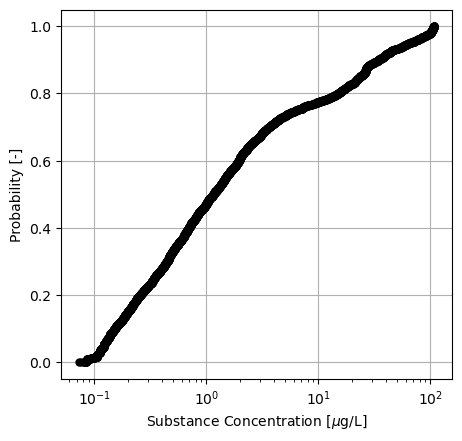

In [15]:
CDF_properties = compute_CDF(demand, water_quality, 2, plot=True)

# Plotting time series of substance concentrations at a consumption point

Presenting the time series of substance concentrations at a consumption point is an instructive manner to demonstrate the role of stochastic water demand on the substance concentration dynamics. This can be achieved with the function `plot_demand_and_quality`.

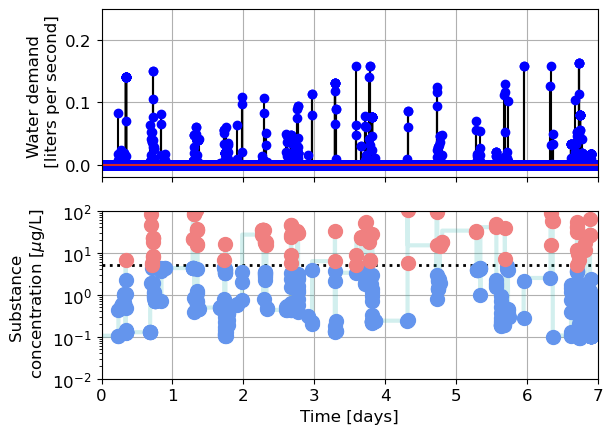

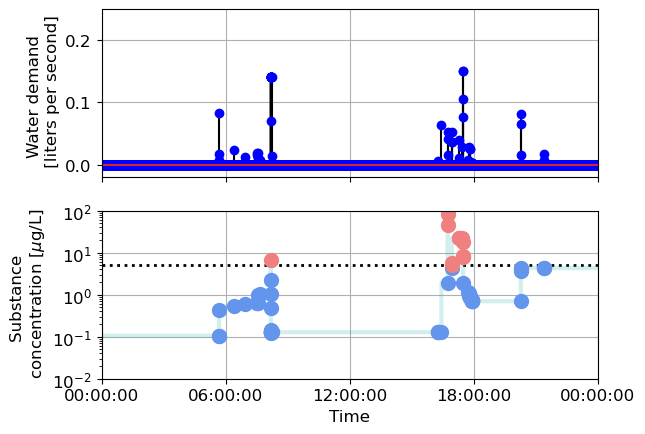

In [17]:
plot_demand_and_quality(demand, water_quality, 2, 1, format_time='Days',xlims=[0,7],font_size=12)
plot_demand_and_quality(demand, water_quality, 2, 1, format_time='HMS',xlims=[0,1],xticks=[0,0.25,0.5,0.75,1],font_size=12)

# Appendix: LEadGO workflow - getting started

## Clone or download repository
- Clone using Command Line Interface or CLI (alternatively use Integrated Development Environment or IDE with git integration eg VScode)
`git clone <https://github.com/KWR-Water/Jupyter-PremisePlumbingLeach.git>`
- Download
<div>
<img src="Figures/Workflow/01.png"/>
</div>

## Create a new environment with dependencies
- Open Anaconda prompt or other CLI and create a new environment
`conda create --name <environment_name>`
- Activate environment
`conda activate <environment_name>`
- Install dependencies using pip or conda. List of dependecies is available in requirements.txt file
`matplotlib==3.8.4; numpy==1.24.4; pandas==2.0.3; wntr==1.1.0`

## Opening the notebook (ipynb file)
<div class="alert alert-block alert-info">
<b>Tip:</b> This part depends on the IDE choice. The steps below correspond to the use of Jupyter notebook. Alternative can be eg VScode. 
</div>

- To open the jupyter notebook (LEadGO.ipynb file) install notebook library
`pip install notebook`
- Open jupyter notebook by typing in terminal
    - Before running the jupyter notebook change the working directory to the folder containing ipynb file
    `cd <folder_path>`
    - If the folder is on a different drive (eg D drive), change the drive first
    `D:`
    - Open jupyter notebook
    `jupyter notebook`
    - A new tab in the browser will appear, select the LEadGO.ipynb file
<div>
<img src="Figures/Workflow/02.png"/>
</div>

<div>
<img src="Figures/Workflow/03.png"/>
</div>


# Appendix: LEadGO workflow - example of creating input files from scratch using pySIMDEUM

<div class="alert alert-block alert-info">
<b>Level 3:</b> This is the third level of running the program. This is an example where a potential user was asked to run LEadGO with input files generated by the user. The script below is provided by the user and is not currently integrated into LEadGO. 
</div>

- Create the geometry of the plumbing system. In this example, the geometry is guessed based on the layout of a home.
<div>
<img src="Figures/Workflow/07.png"/>
</div>
- Install pysimdeum to the environment
`pip install pysimdeum`
- Create new function `create_simdeum_patterns` in ImportFunctions.py
```python
def create_simdeum_patterns(house_type='two_person', duration = '7 day'):
# creating a house
count_enduses = 0
while count_enduses != 8:
#we use this bruteforce while loop to find a house that has all 8 enduses. 
# We could also manipulate the statistics to enforce this but this is hopefully quicker.
house = pysimdeum.built_house(house_type = house_type)
count_enduses = len(house.appliances)  
print('found house')

# create premise plumbing patterns
consumption = house.simulate(num_patterns=1, duration = duration)

return consumption
```
- Assign SIMDEUM patterns to a house by adding function `assigning_simdeum_patterns` in ImportFunctions.py
```python
def assigning_simdeum_patterns(enduse_list, consumption, wn):
    # make a copy of network model
    wn_new = copy.deepcopy(wn)
    
    # calculate multipliers per enduse
    simdeum_multipliers = dict.fromkeys(enduse_list)
        
    simdeum_multipliers['Brtap_1'] = consumption.sel(user='user_1').sel(enduse='BathroomTap').sel(flowtypes='totalflow').sel(patterns=0)
    simdeum_multipliers['WC_1'] = consumption.sel(user='user_1').sel(enduse='Wc').sel(flowtypes='totalflow').sel(patterns=0)
    simdeum_multipliers['Ktap'] = consumption.sel(user='household').sel(enduse='KitchenTap').sel(flowtypes='totalflow').sel(patterns=0)
    simdeum_multipliers['DW'] = consumption.sel(user='household').sel(enduse='Dishwasher').sel(flowtypes='totalflow').sel(patterns=0)
    simdeum_multipliers['Ktap_H'] = consumption.sel(user='household').sel(enduse='KitchenTap').sel(flowtypes='hotflow').sel(patterns=0)
    simdeum_multipliers['WC_2'] = consumption.sel(user = 'user_2').sel(enduse='Wc').sel(flowtypes='totalflow').sel(patterns=0)
    simdeum_multipliers['Brtap_2'] = consumption.sel(user = 'user_2').sel(enduse='BathroomTap').sel(flowtypes='totalflow').sel(patterns=0)
    simdeum_multipliers['Shower'] = consumption.sel(user='household').sel(enduse='Shower').sel(flowtypes='totalflow').sel(patterns=0)
    simdeum_multipliers['Shower_H'] = consumption.sel(user='household').sel(enduse='Shower').sel(flowtypes='hotflow').sel(patterns=0)
    simdeum_multipliers['Brtap_2_H'] = consumption.sel(user = 'user_2').sel(enduse='BathroomTap').sel(flowtypes='hotflow').sel(patterns=0)
    simdeum_multipliers['WM'] = consumption.sel(user='household').sel(enduse='WashingMachine').sel(flowtypes='totalflow').sel(patterns=0)
    
    # check patterns
    for enduse in enduse_list:
        plt.plot(range(len(simdeum_multipliers[enduse])), simdeum_multipliers[enduse])
        plt.title(enduse)
        
    # assign new simdeum patterns
    for enduse in enduse_list:
        wn_new.get_pattern(enduse).multipliers = simdeum_multipliers[enduse]
        
    # change base demand of enduse to 1/1000
    for enduse in enduse_list:
        junction = wn_new.get_node(enduse)
        for demand in junction.demand_timeseries_list:
            if demand.pattern_name == enduse:
                demand.base_value = 1/1000
                
    return wn_new

```
- To use the above functions in combination with the notebook, a new cell is added at the top of the notebook
```python
#%% make inp with new SIMDEUM patterns and save it in Test/Input/ folder
if True:
    # input
    enduse_list = ['Brtap_1',
        'WC_1',
        'Ktap',
        'DW',
        'Ktap_H',
        'WC_2',
        'Brtap_2',
        'Shower',
        'Shower_H',
        'Brtap_2_H',
        'WM'
    ]
    house_type='two_person' 
    duration = '1 day'
    inp_path = 'D:/Users/mitrodj/Desktop/onedrive - kwr water/kwr_projects/LEadGO/repository/jupyter-premiseplumbingleach/Examples/Input/Example01.inp'
    #inp_path = 'D:/Users/mitrodj/Desktop/onedrive - kwr water/kwr_projects/LEadGO/Appartment 4a.inp'
    saving_folder = 'D:/Users/mitrodj/Desktop/OneDrive - KWR Water/KWR_Projects/LEadGO/repository/Jupyter-PremisePlumbingLeach/Test/Input/'
    saving_name = 'Example_new'
    
    # analysis
    consumption = create_simdeum_patterns(house_type = house_type, duration = duration)
    wn = wntr.network.WaterNetworkModel(inp_path)
    wn_new = assigning_simdeum_patterns(enduse_list, consumption, wn)
    wntr.network.io.write_inpfile(wn_new, f'{saving_folder}{saving_name}01.inp')
    print('network with new multipliers saved')

```